# IBTrACS
<!-- markdownlint-disable MD013 -->

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString

from src.datasources import ibtracs, zmi

In [4]:
gdf_zmi = zmi.load_zmi()

In [5]:
total_bounds = gdf_zmi.total_bounds

In [6]:
total_bounds

array([-86.8,  18.5, -72.3,  24. ])

In [9]:
df_all = ibtracs.load_ibtracs_in_bounds(*total_bounds)

In [11]:
df_all.dtypes

point_id                               object
sid                                    object
valid_time                     datetime64[ns]
latitude                              float64
longitude                             float64
wind_speed                            float64
gust_speed                             object
pressure                              float64
max_wind_radius                       float64
last_closed_isobar_radius             float64
last_closed_isobar_pressure           float64
basin                                  object
category                               object
nature                                 object
provider                               object
quadrant_radius_34                     object
quadrant_radius_50                     object
quadrant_radius_64                     object
created_at                     datetime64[ns]
dtype: object

In [17]:
df_all.groupby("sid")["provider"].nunique()

sid
2023152N26274    1
2023239N21274    1
2023321N15278    1
Name: provider, dtype: int64

In [31]:
df_agg = (
    df_all.groupby("sid")
    .agg(
        valid_time_min=("valid_time", "min"),
        valid_time_max=("valid_time", "max"),
        wind_speed_max=("wind_speed", "max"),
    )
    .reset_index()
)

In [32]:
df_agg

,sid,valid_time_min,valid_time_max,wind_speed_max
0,2023152N26274,2023-06-03 18:00:00.000039,2023-06-04 06:00:00.000039,25.0
1,2023239N21274,2023-08-26 12:00:00.000039,2023-08-29 12:00:00.000039,70.0
2,2023321N15278,2023-11-17 21:00:00.000039,2023-11-18 00:00:00.000039,30.0


In [35]:
df_all

,point_id,sid,valid_time,latitude,longitude,wind_speed,gust_speed,pressure,max_wind_radius,last_closed_isobar_radius,last_closed_isobar_pressure,basin,category,nature,provider,quadrant_radius_34,quadrant_radius_50,quadrant_radius_64,created_at
0,c1301af0-1121-4d7a-b0d6-404b3374ca12,2023152N26274,2023-06-03 18:00:00.000039,23.900000,-85.000000,25.0,None,1001.0,40.0,140.0,1005.0,NA,None,DS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
1,84c880d2-2599-45ab-81e2-f7935c823808,2023152N26274,2023-06-03 21:00:00.000039,23.677523,-84.609840,25.0,None,1001.0,40.0,140.0,1005.0,NA,None,DS,None,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
2,b0fa7986-9643-4f9b-8dd3-5475eed81819,2023152N26274,2023-06-04 00:00:00.000039,23.500000,-84.099998,25.0,None,1002.0,40.0,140.0,1005.0,NA,None,DS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
3,23c6f4e5-64eb-4236-b7de-2a0e2040fa7c,2023152N26274,2023-06-04 03:00:00.000039,23.382824,-83.555038,25.0,None,1002.0,35.0,140.0,1005.0,NA,None,DS,None,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
4,aec981f4-4cb9-490f-9ba9-13691e347123,2023152N26274,2023-06-04 06:00:00.000039,23.299999,-83.000000,25.0,None,1002.0,30.0,140.0,1005.0,NA,None,DS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
5,43f85cbf-b398-4650-86fc-047dd5a6bdbc,2023239N21274,2023-08-26 12:00:00.000039,20.799999,-86.099998,25.0,None,1006.0,90.0,150.0,1009.0,NA,None,TS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
6,55f592a6-af12-455f-81c6-1e5883c98961,2023239N21274,2023-08-26 15:00:00.000039,21.110016,-86.144974,25.0,None,1006.0,80.0,150.0,1009.0,NA,None,TS,None,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
7,2e965b3b-5aa9-446c-8036-c05b3cda2876,2023239N21274,2023-08-26 18:00:00.000039,21.299999,-86.199997,25.0,None,1006.0,70.0,150.0,1009.0,NA,None,TS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
8,9db7d090-e2ea-4880-af06-5d3d0eeb3e78,2023239N21274,2023-08-26 21:00:00.000039,21.282465,-86.277428,27.0,None,1005.0,55.0,150.0,1008.0,NA,None,TS,None,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070
9,755fb704-d58d-4f17-8799-3997ec3b14ac,2023239N21274,2023-08-27 00:00:00.000039,21.100000,-86.400002,30.0,None,1004.0,40.0,150.0,1008.0,NA,None,TS,nhc_working_bt,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",2025-04-30 21:10:39.349070


In [51]:
def df_to_track_lines(df: pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Convert a DataFrame of points to a GeoDataFrame of LineStrings,
    grouped by 'sid'.

    Parameters:
        df: DataFrame with 'sid', 'latitude', 'longitude' columns

    Returns:
        GeoDataFrame with one LineString per 'sid'
    """
    # Ensure sorted order if needed (e.g., by time)
    df = df.sort_values(["sid"])  # optionally add 'time' or similar

    # Group and build LineStrings
    lines = (
        df.groupby("sid")
        .apply(
            lambda group: LineString(
                zip(group["longitude"], group["latitude"])
            ),
            include_groups=False,
        )
        .reset_index(name="geometry")
    )

    return gpd.GeoDataFrame(lines, geometry="geometry", crs="EPSG:4326")

In [52]:
gdf_tracks = df_to_track_lines(df_all)

In [53]:
gdf_tracks

,sid,geometry
0,2023152N26274,"LINESTRING (-85 23.9, -84.60984 23.67752, -84...."
1,2023239N21274,"LINESTRING (-85.18496 20.2125, -85.2 20.6, -85..."
2,2023321N15278,"LINESTRING (-77.84354 18.57282, -77.2 19.2)"


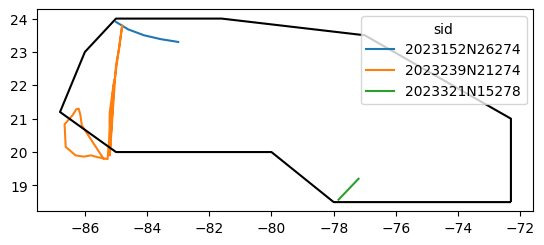

In [66]:
fig, ax = plt.subplots()
for sid, row in gdf_tracks.iterrows():
    x, y = row.geometry.xy
    ax.plot(x, y, label=str(row["sid"]))
gdf_zmi.boundary.plot(ax=ax, color="k")
ax.legend(title="sid", loc="upper right")